### EXAMPLE

In [1]:
>>> from river import compose
>>> from river import linear_model
>>> from river import preprocessing
>>> from river import optim

>>> models = [
...     compose.Pipeline(
...     preprocessing.StandardScaler(),
...         linear_model.LinearRegression(optimizer=optim.SGD(lr=lr))
...         ) for lr in [1e-4, 1e-3, 1e-2, 1e-1]
... ]


>>> from river import datasets
>>> dataset = datasets.TrumpApproval()

>>> from river.expert import UCBRegressor
>>> bandit = EpsilonGreedyRegressor(models=models, seed=1)

>>> for x, y in dataset:
...     bandit = bandit.learn_one(x=x, y=y)

>>> print(bandit.percentage_pulled)

>>> print(bandit.average_reward)

>>> best_model = bandit.best_model
>>> print(best_model)


NameError: name 'EpsilonGreedyRegressor' is not defined

In [35]:
linear_reg = best_model["LinearRegression"]

In [36]:
best_model["LinearRegression"].intercept_lr.learning_rate

0.01

### SCRIPT

In [2]:
%load_ext autoreload
%autoreload 2

#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns

from river import (
    optim,
    datasets,
    preprocessing,
    linear_model,
    metrics,
    compose
)
from river.expert import (
    UCBRegressor,
    EpsilonGreedyRegressor,
 #   Exp3Regressor
)
from river.stats import Mean
from river.utils.math import sigmoid

import numpy as np
import random
from random import shuffle

def r_argmax(lst: list):
    max_value = max(lst)
    args_max = [i for (i, x) in enumerate(lst) if x == max_value]
    arg_max = random.choice(args_max)
    return arg_max

In [3]:
dataset = datasets.TrumpApproval()

def get_models():
    models = [
        compose.Pipeline(
            preprocessing.StandardScaler(),
            #linear_model.LinearRegression(l2=l2, optimizer=optim.SGD(lr=0.01)) # changer le l2 donne de mauvais résultats
            linear_model.LinearRegression(optimizer=optim.SGD(lr=lr))
        ) for lr in reversed([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
    ]
    return models

#print([model["LinearRegression"].l2 for model in bandit])
watch = []
l = []

bandit = UCBRegressor(
    models=get_models(),
    #metric=metrics.MAE(),
    #explore_each_arm=1,
    #start_after=10,
)
print(bandit.explore_each_arm)
for i, (x,y) in enumerate(dataset):
    bandit.predict_one(x=x)
    never_pulled_arm = [i for (i, n) in enumerate(bandit._N) if  n < bandit.explore_each_arm]
    #print("never pulled", never_pulled_arm)
    pred = bandit.predict_one(x=x)
    
    reward, current_metric , chosen_arm = bandit._learn_one(x=x, y=y)
    watch.append((current_metric, reward, chosen_arm))
    

    if bandit.warm_up:
        print("warmup")
    print("reward:", reward)
    print("ave_reward:", bandit.average_reward)
    print("arm:", chosen_arm)
    print("Times pulled", bandit._N)
    print("\n")
    print(bandit)
    
    if i == 60:
        break

    
l.append(bandit.percentage_pulled)


1
warmup
reward: 1.0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 5
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 3
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 4
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 3
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 3
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 3
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 5
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 4
Times pulled [0, 0, 0, 0, 0, 0]


UCBRegressor
warmup
reward: 0
ave_reward: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
arm: 1
Times pulled [0, 

In [13]:
dataset = datasets.TrumpApproval()


lr_grid = list( ([1e-7, 1e-6, 1e-2, 1e-5, 1e-6, 1e-3, 1e-2, 1e-1, 5*(1e-1), 5*1e-2]))
shuffle(lr_grid)

#lr_grid = [1e-3]*8

def get_models():
    models = [
        compose.Pipeline(
            preprocessing.StandardScaler(),
            #linear_model.LinearRegression(l2=l2, optimizer=optim.SGD(lr=0.01)) # changer le l2 donne de mauvais résultats
            linear_model.LinearRegression(optimizer=optim.SGD(lr=lr))
        ) for lr in list(lr_grid)
    ]
    return models

#print([model["LinearRegression"].l2 for model in bandit])
watch = []
l = []
pct_pull = []
for _ in tqdm.tqdm(range(50)):
    
    add_model = [
        compose.Pipeline(
            preprocessing.StandardScaler(),
            #linear_model.LinearRegression(l2=l2, optimizer=optim.SGD(lr=0.01)) # changer le l2 donne de mauvais résultats
            linear_model.LinearRegression(optimizer=optim.SGD(lr=1e-2))
        )
    ]
    
    sc = preprocessing.StandardScaler()

    bandit = EpsilonGreedyRegressor(
        models=get_models(),
        metric=metrics.MAE(),
        #explore_each_arm=0,
        #scale_y=True,
        #start_after=10,
    )
    
    for i, (x,y) in enumerate(dataset):
        #y = sc.learn_one(dict(y=y)).transform_one(dict(y=y))["y"]
        current_metric, reward, chosen_arm = bandit._learn_one(x=x, y=y)
        #watch.append((current_metric, reward, chosen_arm))
    #l.append(bandit.percentage_pulled)
    l.append(bandit.average_reward)
    pct_pull.append(bandit.percentage_pulled)
    


100%|██████████| 50/50 [00:03<00:00, 14.24it/s]


<AxesSubplot:xlabel='model', ylabel='value'>

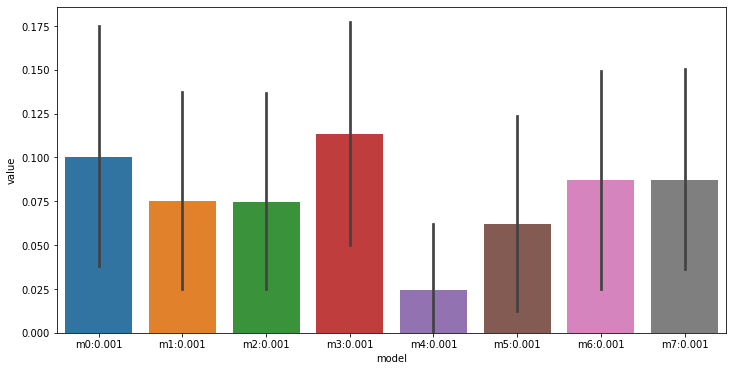

In [10]:
df = pd.melt(pd.DataFrame(l).rename(columns={i:("m"+str(i)+":"+str(lr)) for (i, lr) in enumerate(lr_grid)}), var_name="model")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,#df[~df.model.isin(["am6:0.5","am5:0.1"])],
    x="model", y="value")

<AxesSubplot:xlabel='model', ylabel='value'>

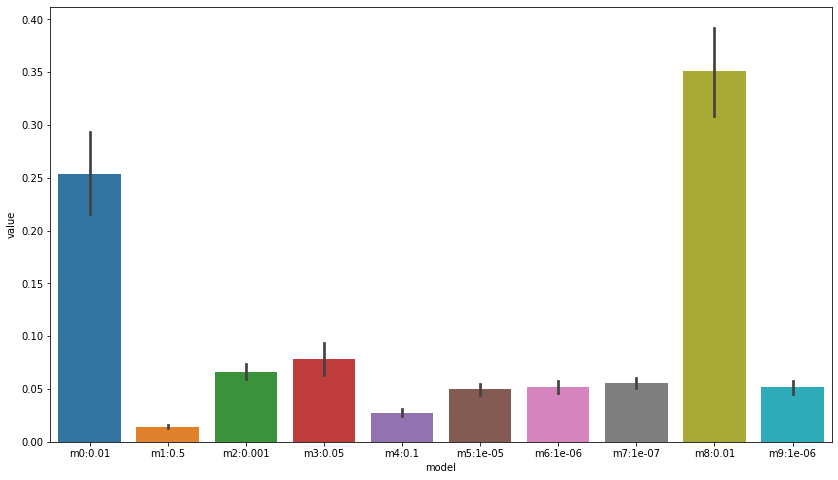

In [439]:
df = pd.melt(pd.DataFrame(pct_pull).rename(columns={i:("m"+str(i)+":"+str(lr)) for (i, lr) in enumerate(lr_grid)}), var_name="model")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,#df[~df.model.isin(["am6:0.5","am5:0.1"])],
    x="model", y="value")

<AxesSubplot:xlabel='model', ylabel='value'>

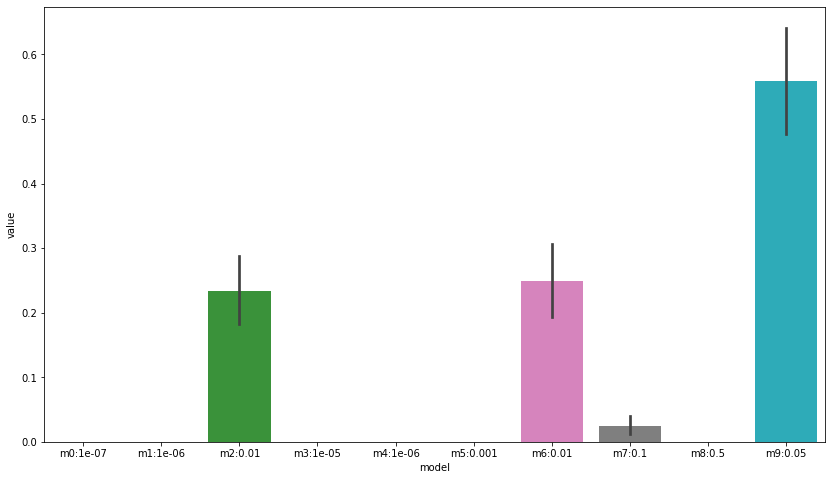

In [420]:
df = pd.melt(pd.DataFrame(l).rename(columns={i:("m"+str(i)+":"+str(lr)) for (i, lr) in enumerate(lr_grid)}), var_name="model")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,#df[~df.model.isin(["am6:0.5","am5:0.1"])],
    x="model", y="value")

<AxesSubplot:xlabel='model', ylabel='value'>

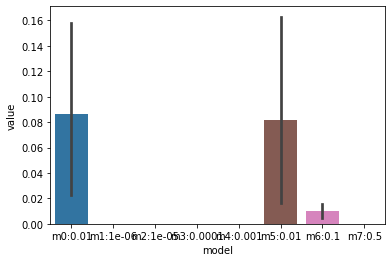

In [348]:
df = pd.melt(pd.DataFrame(l).rename(columns={i:("m"+str(i)+":"+str(lr)) for (i, lr) in enumerate(lr_grid)}), var_name="model")

sns.barplot(
    data=df[~df.model.isin(["am6:0.5","am5:0.1"])],
    x="model", y="value")

<AxesSubplot:xlabel='model', ylabel='value'>

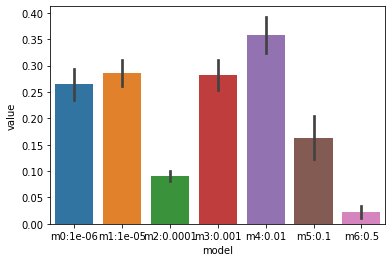

In [126]:
df = pd.melt(pd.DataFrame(l).rename(columns={i:("m"+str(i)+":"+str(lr)) for (i, lr) in enumerate(lr_grid)}), var_name="model")

sns.barplot(
    data=df[~df.model.isin(["am6:0.5","am5:0.1"])],
    x="model", y="value")

### Scaling y and sigmoid

<AxesSubplot:xlabel='model', ylabel='value'>

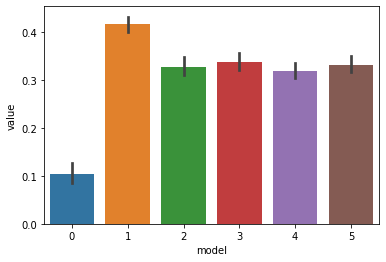

In [254]:
sns.barplot(data=pd.melt(pd.DataFrame(l), var_name="model"), x="model", y="value")

<AxesSubplot:xlabel='model', ylabel='value'>

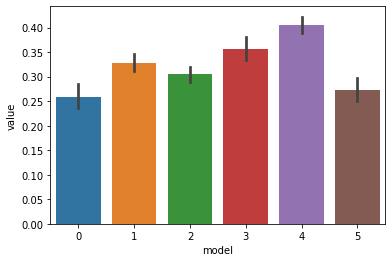

In [256]:
sns.barplot(data=pd.melt(pd.DataFrame(l), var_name="model"), x="model", y="value")